<a href="https://colab.research.google.com/github/sahil07-rg/Vibrational-analysis/blob/main/Vibrational_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total samples: 20480


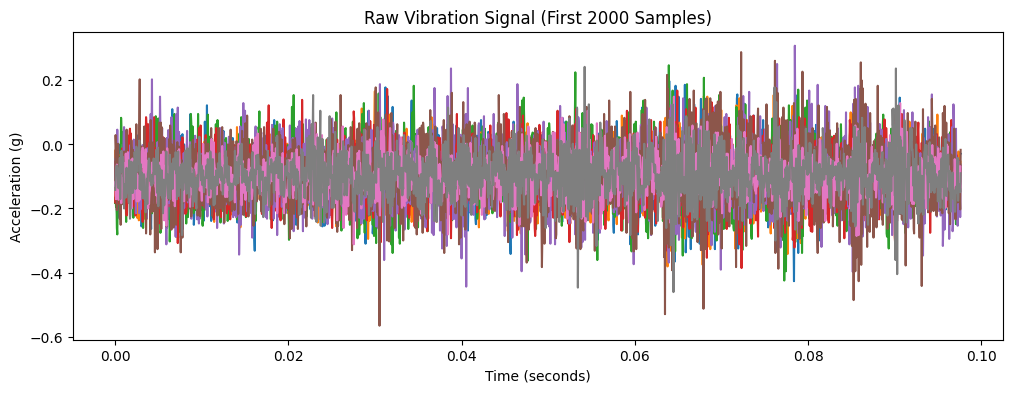

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
# Load raw vibration data
data = np.loadtxt("2003.10.22.12.06.24")

Fs = 20480  # Sampling rate (Hz)
t = np.arange(len(data)) / Fs

print("Total samples:", len(data))
plt.figure(figsize=(12,4))
plt.plot(t[:2000], data[:2000])
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (g)")
plt.title("Raw Vibration Signal (First 2000 Samples)")
plt.show()

In [4]:
data_dc = data - np.mean(data)
print("Mean before:", np.mean(data))
print("Mean after :", np.mean(data_dc))

Mean before: -0.09286718139648438
Mean after : 4.206704429243757e-18


In [5]:
mean = np.mean(data_dc)
std = np.std(data_dc)

z_scores = (data_dc - mean) / std
outliers = np.abs(z_scores) > 5
cleaned_data = np.copy(data_dc)
cleaned_data[outliers] = mean # replaces spike with mean value over 5 kernel.
from scipy.signal import medfilt
# median filter used for fine tuning the spikes.
filtered = medfilt(cleaned_data, kernel_size=5)


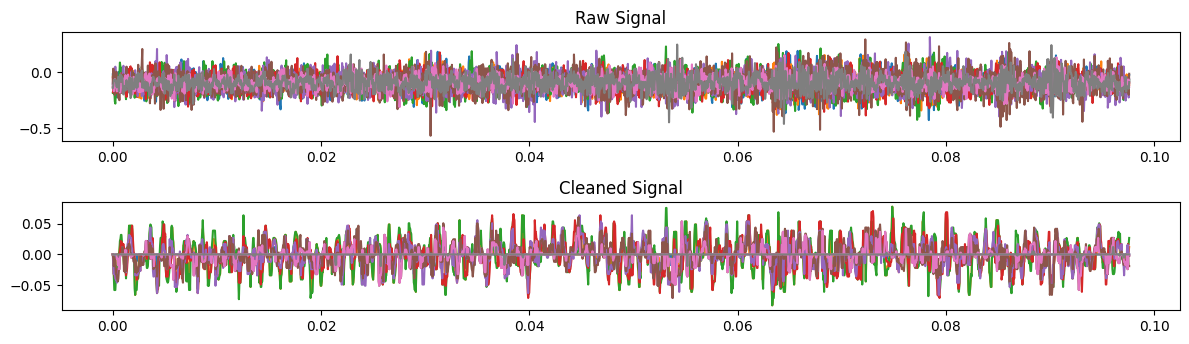

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(3,1,1)
plt.plot(t[:2000], data[:2000])
plt.title("Raw Signal")

plt.subplot(3,1,2)
plt.plot(t[:2000], filtered[:2000])
plt.title("Cleaned Signal")


plt.tight_layout()
plt.show()

### *FFT freq domain data

In [10]:
print(cleaned_data.shape) # here we are checking how much channel is there for the signal data and it comes out to be 8 so we individually check the data in each channel of the signal in the above code.

(20480, 8)


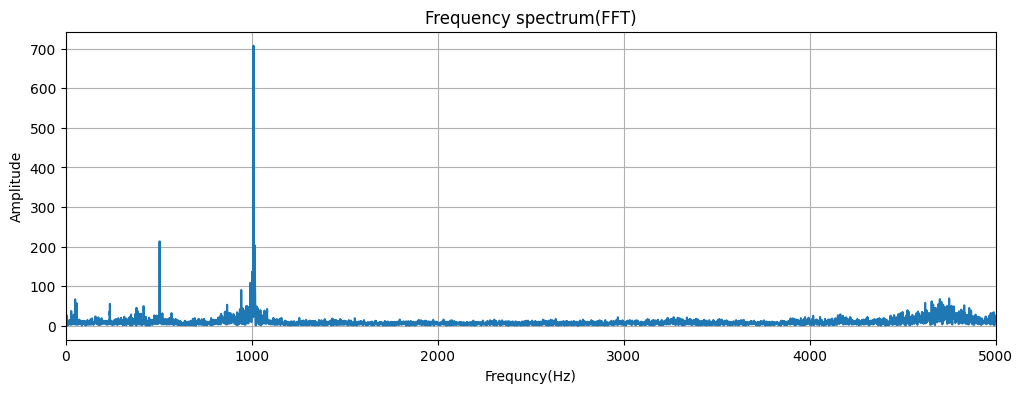

In [22]:
from scipy.fft import rfft, rfftfreq
signal=cleaned_data[:,2]#taking the 2nd channel data
N=len(signal)
Fs=20480
yf=rfft(signal)
xf=rfftfreq(N,1/Fs)
magnitude=np.abs(yf) # shows the absolute value of yf means the original yf would be in complex number and the absolute value is the root of the complex value.
plt.figure(figsize=(12,4))
plt.plot(xf,magnitude)
plt.xlim(0,5000)# Upto 20480/2 <= 10240 ~ 10000 we can take the limit of x
plt.xlabel("Frequncy(Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency spectrum(FFT)")
plt.grid()
plt.show()